# METODI DIRETTI
## Risoluzione di sistemi lineari con matrice generica
### Scrivere uno script Python che:
1. Crea un problema test di dimensione variabile $n$ la cui soluzione esatta sia il vettore $x$ di tutti elementi unitari e $b$ il termine noto ottenuto moltiplicando la matrice $A$ per la soluzione $x$.
2. calcola il numero di condizione (o una stima di esso)
3. risolve il sistema lineare $Ax = b$ con la **fattorizzazione LU con pivoting**.

### Problemi test
- Una matrice di numeri casuali $A$ generata con la funzione `randn` di Matlab, ($n$ variabile fra 10 e 1000)

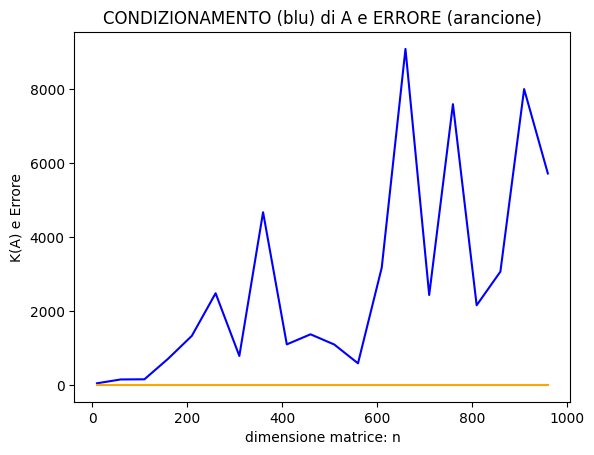

In [18]:
from turtle import color
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt

MIN, MAX, STEP = 10, 1000, 50

# Hilbert
K_A = np.zeros(MAX-MIN)
Err = np.zeros(MAX-MIN)

for n in range(MIN, MAX, STEP):
    A = np.random.randn(n, n)
    x = np.ones((n, 1))
    b = np.dot(A, x)

    lu, piv = LA.lu_factor(A)
    my_x = LA.lu_solve((lu, piv), b)

    K_A[n-MIN] = np.linalg.cond(A)
    Err[n-MIN] = LA.norm(x-my_x, ord=2) / LA.norm(x, ord=2)
    x = np.arange(start=MIN, stop=MAX, step=STEP)

K_A = [v for v in K_A if v != 0]
Err = [v for v in Err if v != 0]

plt.title('CONDIZIONAMENTO (blu) di A e ERRORE (arancione)')
plt.xlabel('dimensione matrice: n')
#plt.xticks(x)
plt.ylabel('K(A) e Errore')
#plt.yticks(K_A)
plt.plot(x, K_A, color='blue')
plt.plot(x, Err, color='orange')
plt.show()
    


## Risoluzione di sistemi lineari con matrice simmetrica e definita positiva.
### Scrivere uno script Python che:
1. crea un problema test di dimensione variabile $n$ la cui soluzione esatta sia il vettore $x$ di tutti elementi unitari e $b$ il termine noto ottenuto moltiplicando la matrice $A$ per la soluzione $x$.
2. calcola il numero di condizione (o una stima di esso)
3. risolve il sistema lineare $Ax = b$ con la fattorizzazione di Cholesky.

### Problemi test
- matrice di Hilbert di dimensione n (con n variabile fra 2 e 15)
- matrice tridiagonale simmetrica e definita positiva avente sulla diagonale elementi uguali a 9 e quelli sopra e sottodiagonali uguali a -4.

### Per ogni problema test:
- Disegna il grafico del numero di condizione in funzione della dimensione del sistema
- Disegna il grafico dell’errore in norma 2 in funzione della dimensione del sistema

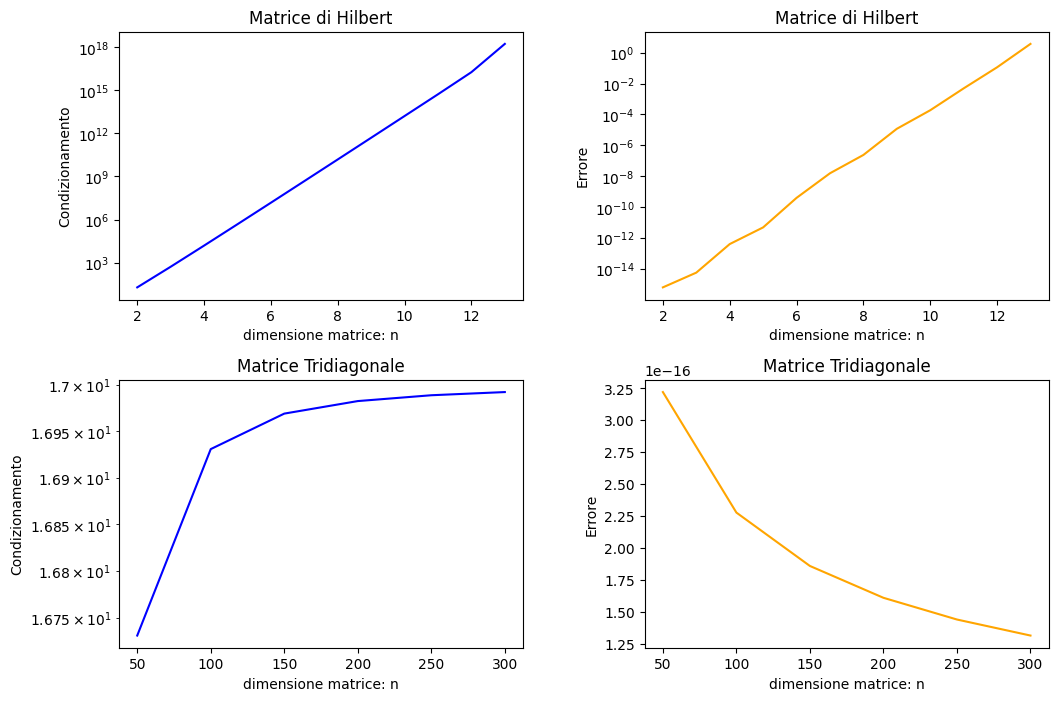

In [2]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt

MIN, MAX, STEP = 2, 14, 1

figure, axis = plt.subplots(2, 2, figsize=(12, 8))
figure.subplots_adjust(hspace = 0.3, wspace = 0.3)

# Hilbert
K_A = np.zeros(MAX-MIN)
Err = np.zeros(MAX-MIN)
for n in range(MIN, MAX, STEP):
    A = LA.hilbert(n)
    x = np.ones((n, 1))
    b = np.dot(A, x)

    L = LA.cholesky(A, lower = True)
    y = LA.solve(L, b, lower = True)
    my_x = LA.solve(L.T, y, lower = False)

    K_A[n-MIN] = np.linalg.cond(A)
    Err[n-MIN] = LA.norm(x-my_x, ord=2) / LA.norm(x, ord=2)
    x = np.arange(start=MIN, stop=MAX, step=STEP)

K_A = [v for v in K_A if v != 0]
Err = [v for v in Err if v != 0]

axis[0, 0].set_title('Matrice di Hilbert')
axis[0, 0].set_xlabel('dimensione matrice: n')
axis[0, 0].set_ylabel('Condizionamento')
axis[0, 0].set_yscale('log')
axis[0, 0].plot(x, K_A, color='blue', label='Condizionamento')

axis[0, 1].set_title('Matrice di Hilbert')
axis[0, 1].set_xlabel('dimensione matrice: n')
axis[0, 1].set_ylabel('Errore')
axis[0, 1].set_yscale('log')
axis[0, 1].plot(x, Err, color='orange', label='Errore')


MIN, MAX, STEP = 50, 301, 50

# Tridiagonale simmetrica e definita positiva
K_A = np.zeros(MAX-MIN)
Err = np.zeros(MAX-MIN)
for n in range(MIN, MAX, STEP):
    A = np.diag(np.full(n, fill_value = 9)) + np.diag(np.full(n-1, fill_value = -4), k = 1) + np.diag(np.full(n-1, fill_value = -4), k = -1)
    x = np.ones((n, 1))
    b = np.dot(A, x)

    L = LA.cholesky(A, lower = True)
    y = LA.solve(L, b, lower = True)
    my_x = LA.solve(L.T, y, lower = False)

    K_A[n-MIN] = np.linalg.cond(A)
    Err[n-MIN] = LA.norm(x-my_x, ord=2) / LA.norm(x, ord=2)
    x = np.arange(start=MIN, stop=MAX, step=STEP)

K_A = [v for v in K_A if v != 0]
Err = [v for v in Err if v != 0]

axis[1, 0].set_title('Matrice Tridiagonale')
axis[1, 0].set_xlabel('dimensione matrice: n')
axis[1, 0].set_ylabel('Condizionamento')
axis[1, 0].set_yscale('log')
axis[1, 0].plot(x, K_A, color='blue', label='Condizionamento')

axis[1, 1].set_title('Matrice Tridiagonale')
axis[1, 1].set_xlabel('dimensione matrice: n')
axis[1, 1].set_ylabel('Errore')
#axis[1, 1].set_yscale('log')
axis[1, 1].plot(x, Err, color='orange', label='Errore')
plt.show()



# METODI ITERATIVI
Scrivi le funzioni `Jacobi(A, b, x0, maxit, tol, xTrue)` e `GaussSeidel(A, b, x0, maxit, tol, xTrue)` per implementare i metodi di Jacobi e di Gauss Seidel per la risoluzione di sistemi lineari con matrice a diagonale dominante.

In particolare:
- `x0` sia l’iterato iniziale;
- La condizione d’arresto sia dettata dal numero massimo di iterazioni consentite `maxit` e dalla tolleranza `tol` sulla differenza relativa fra due iterati successivi;
- Si preveda in input la soluzione esatta `xTrue` per calcolare l’errore relativo ad ogni iterazione.

Entrambe le funzioni restituiscano in output:
- La soluzione `x`;
- Il numero `k` di iterazioni effettuate;
- Il vettore `relErr` di tutti gli errori relativi.

Test
- Considerare la precedente matrice tridiagonale per `N = 100`.
- Verificare, calcolando il raggio spettrale della matrice, la convergenza dei metodi.
- Eseguire i metodi con tolleranza 1.e-8.
- Riportare in un grafico l’errore relativo (in norma 2) di entrambi i metodi al variare del numero di iterazioni per `N` fiossato (scegliere almeno due valori di `N`).
- Riportare in un grafico l’errore relativo finale dei metodi al variare della dimensione `N` del sistema.
- Riportare in un grafico il numero di iterazioni di entrambi i metodi al variare di `N`
- Riportare in un grafico il tempo impiegato dai metodi di Jacobi, Gauss Sidel, LU, Cholesky al variare di `N`.

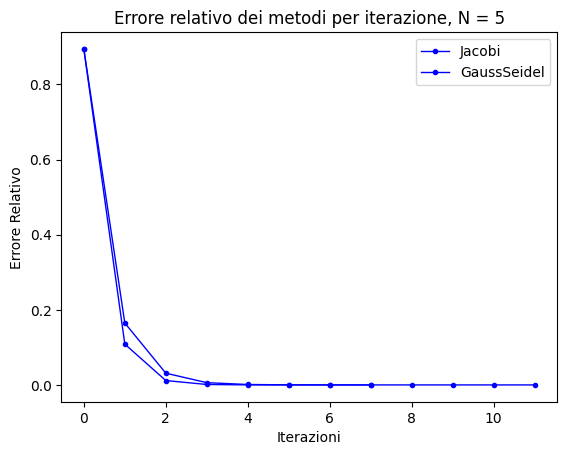

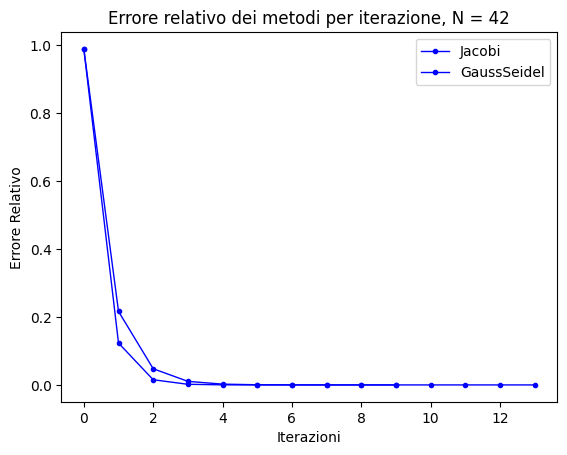

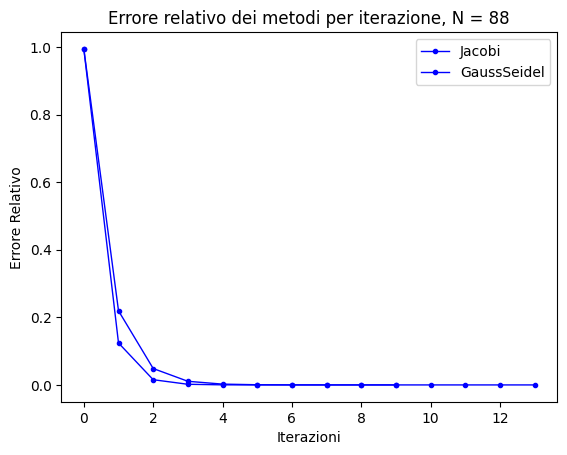

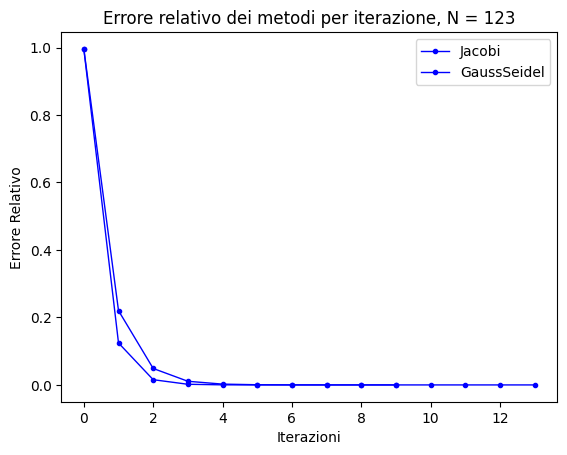

Fatto con N = 50
Fatto con N = 100
Fatto con N = 150
Fatto con N = 200
Fatto con N = 250
Fatto con N = 300
Fatto con N = 350
Fatto con N = 400


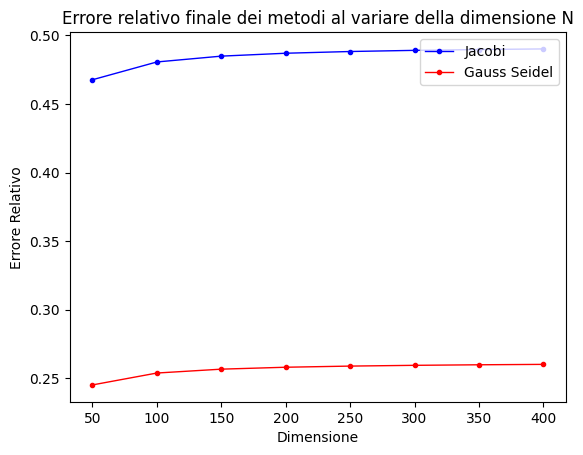

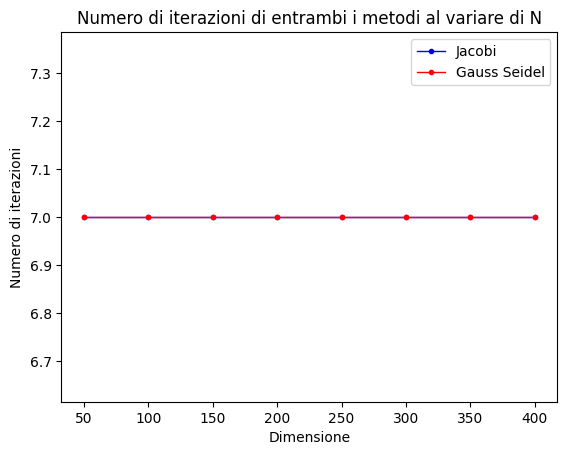

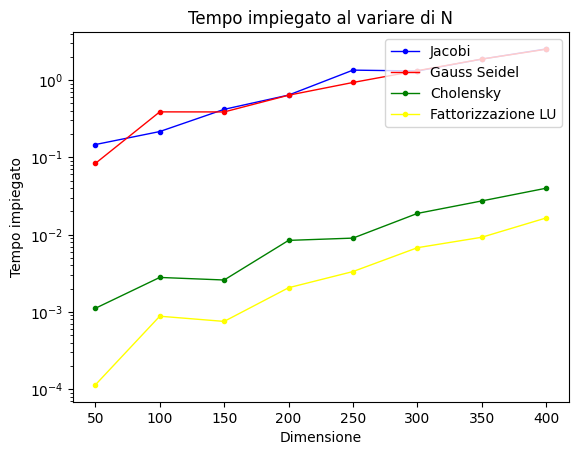

In [16]:
from multiprocessing.connection import wait
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
import time

# Metodo tramite prodotto di matrici
def Jacobi(A, b, x0, maxit, tol, xTrue):
    n = np.size(x0)
    ite = 0
    x = np.copy(x0)
    norma_it = 1 + tol
    relErr = np.zeros((maxit, 1))
    errIter = np.zeros((maxit, 1))
    relErr[0] = np.linalg.norm(xTrue - x0) / np.linalg.norm(xTrue)
    while (ite < maxit-1 and norma_it > tol):
        x_old = np.copy(x)
        for i in range(0, n):
            x[i] = (b[i] - sum([A[i, j] * x_old[j] for j in range(0, i)]) - sum([A[i, j] * x_old[j] for j in range(i + 1, n)])) / A[i, i]
            #x[i] = (b[i] - np.dot(A[i, 0:i], x_old[0:i]) - np.dot(A[i, i+1:n], x_old[i+1:n])) / A[i, i]
        ite = ite + 1
        norma_it = np.linalg.norm(x_old - x) / np.linalg.norm(x_old)
        relErr[ite] = np.linalg.norm(xTrue - x) / np.linalg.norm(xTrue)
        errIter[ite - 1] = norma_it
    relErr = relErr[:ite]
    errIter = errIter[:ite]  
    return [x, ite, relErr, errIter]

def GaussSeidel(A,b,x0,maxit,tol, xTrue):
    n = np.size(x0)
    ite = 0
    x = np.copy(x0)
    norma_it = 1 + tol
    relErr = np.zeros((maxit, 1))
    errIter = np.zeros((maxit, 1))
    relErr[0] = np.linalg.norm(xTrue - x0) / np.linalg.norm(xTrue)
    while (ite < maxit-1 and norma_it > tol):
        x_old = np.copy(x)
        for i in range(0, n):
            x[i] = (b[i] - sum([A[i, j] * x[j] for j in range(0, i)]) - sum([A[i, j] * x_old[j] for j in range(i + 1, n)])) / A[i, i]
            #x[i] = (b[i] - np.dot(A[i, 0:i], x[0:i]) - np.dot(A[i, i+1:n], x_old[i+1:n])) / A[i, i]
        ite = ite + 1
        norma_it = np.linalg.norm(x_old - x) / np.linalg.norm(x_old)
        relErr[ite] = np.linalg.norm(xTrue - x) / np.linalg.norm(xTrue)
        errIter[ite - 1] = norma_it
    relErr = relErr[:ite]
    errIter = errIter[:ite]
    return [x, ite, relErr, errIter]

# Comportamento dell'errore durante le interazioni
Nlist = [5, 42, 88, 123]

for N in Nlist:
    A = 9 * np.eye(N, N, k = 0) - 1 * np.eye(N, N, k = 1) - 1 * np.eye(N, N, k = -1)
    xTrue = np.ones((N, 1))
    b = A @ xTrue

    x0 = np.zeros((N, 1))
    x0[0] = 1

    ite_J, ite_GS = 1000, 1000
    tol = 1e-8

    D = np.diag(np.diag(A))
    E = - 1 * np.tril(A, k = -1)
    F = - 1 * np.triu(A, k = 1)
    Dinv = np.diag([1 / i for i in np.diag(D)])

    DmEinv = LA.inv(D - E)

    # Verifico che siano matrici convergenti calcolando il raggio spettrale della matrice di iterazione
    autovalJac = np.linalg.eigvals(Dinv @ (E + F))
    raggSpeJac = np.max(np.abs(autovalJac))

    autovalGS = np.linalg.eigvals(DmEinv @ F)
    raggSpeGS = np.max(np.abs(autovalGS))
    
    plt.figure()
    
    if (raggSpeJac > 1):
        print('Matrice non convergente per Jacobi, raggio spettrale di Dinv * (E + F) =', raggSpeJac)
    else:
        (xJacobi, kJacobi, relErrJacobi, errIterJacobi) = Jacobi(A, b, x0, ite_J, tol, xTrue)
        rangeJacobi = range (0, kJacobi)
        plt.plot(rangeJacobi, relErrJacobi, label='Jacobi', color='blue', linewidth=1, marker='.')
    if (raggSpeGS > 1):
        print('Matrice non convergente per Gauss, raggio spettrale di (D - E)^-1 * F =', raggSpeJac)
    else:
        (xGS, kGS, relErrGS, errIterGS) = GaussSeidel(A, b, x0, ite_GS, tol, xTrue)
        rangeGS = range(0, kGS)
        plt.plot(rangeGS, relErrGS, label='GaussSeidel', color='blue', linewidth=1, marker='.')

    plt.legend(loc='upper right')
    plt.xlabel('Iterazioni')
    plt.ylabel('Errore Relativo')
    plt.title('Errore relativo dei metodi per iterazione, N = ' + str(N))
    plt.show()

########################################################################################################################
# Comportamento al variare di N

dim = np.arange(start=50, stop=401, step=50)

ErrRelF_J = np.zeros(np.size(dim))
ErrRelF_GS = np.zeros(np.size(dim))

ite_J = np.zeros(np.size(dim))
ite_GS = np.zeros(np.size(dim))

tempoImpiegato_J = np.zeros(np.size(dim))
tempoImpiegato_GS = np.zeros(np.size(dim))
tempoImpiegato_Cho = np.zeros(np.size(dim))
tempoImpiegato_LU = np.zeros(np.size(dim))

tol = 1e-8

i = 0
for n in dim:
    #creazione del problema test
    A = 9 * np.eye(n, n, k = 0) - 4 * np.eye(n, n, k = 1) - 4 * np.eye(n, n, k = -1)
    xTrue = np.ones((n, 1))
    b = A @ xTrue

    x0 = np.zeros((n, 1))
    x0[0] = 1

    D = np.diag(np.diag(A))
    E = - 1 * np.tril(A, k = -1)
    F = - 1 * np.triu(A, k = 1)
    Dinv = np.diag([1 / i for i in np.diag(D)])

    DmEinv = LA.inv(D - E)

    # Verifico che siano matrici convergenti calcolando il raggio spettrale della matrice di iterazione
    autovalJac = np.linalg.eigvals(Dinv @ (E + F))
    raggSpeJac = np.max(np.abs(autovalJac))

    autovalGS = np.linalg.eigvals(DmEinv @ F)
    raggSpeGS = np.max(np.abs(autovalGS))


    if (raggSpeJac > 1):
        print('Matrice non convergente per Jacobi, raggio spettrale di Dinv * (E + F) =', raggSpeJac)
        ErrRelF_J[i] = -1
        ite_J[i] = -1
        tempoImpiegato_J[i] = -1
    else:
        start_time = time.time()
        (xJacobi, kJacobi, relErrJacobi, errIterJacobi) = Jacobi(A, b, x0, ite_J.size, tol, xTrue)
        tempoImpiegato_J[i] = time.time() - start_time
        ite_J[i] = kJacobi
        ErrRelF_J[i] = relErrJacobi[-1]
    if (raggSpeGS > 1):
        print('Matrice non convergente per Gauss, raggio spettrale di (D - E)^-1 * F =', raggSpeJac)
        ErrRelF_GS[i] = -1
        ite_GS[i]= -1
        tempoImpiegato_GS[i] = -1
    else:
        start_time = time.time()
        (xGS, kGS, relErrGS, errIterGS) = GaussSeidel(A, b, x0, ite_GS.size, tol, xTrue)
        tempoImpiegato_GS[i] = time.time() - start_time
        ite_GS[i]= kGS
        ErrRelF_GS[i] = relErrGS[-1]
    
    start_time = time.time()
    L = LA.cholesky(A, lower = True)
    y = LA.solve(L, b, lower = True)
    my_x = LA.solve(L.T, y, lower = False)
    tempoImpiegato_Cho[i] = time.time() - start_time

    start_time = time.time()
    lu, piv = LA.lu_factor(A)
    my_x = LA.lu_solve((lu, piv), b)
    tempoImpiegato_LU[i] = time.time() - start_time

    print('Fatto con N =', dim[i])
    i = i+1
    

# Errore relativo finale dei metodi al variare della dimensione N
plt.figure()
plt.plot(dim, ErrRelF_J, label='Jacobi', color='blue', linewidth=1, marker='.')
plt.plot(dim, ErrRelF_GS, label='Gauss Seidel', color = 'red', linewidth=1, marker='.' )
plt.legend(loc='upper right')
plt.xlabel('Dimensione')
plt.ylabel('Errore Relativo')
plt.title('Errore relativo finale dei metodi al variare della dimensione N')
plt.show()

# Numero di iterazioni di entrambi i metodi al variare di N
plt.figure()
plt.plot(dim, ite_J, label='Jacobi', color='blue', linewidth=1, marker='.')
plt.plot(dim, ite_GS, label='Gauss Seidel', color = 'red', linewidth=1, marker='.' )
plt.legend(loc='upper right')
plt.xlabel('Dimensione')
plt.ylabel('Numero di iterazioni')
plt.title('Numero di iterazioni di entrambi i metodi al variare di N')
plt.show()

# Tempo per ogni metodo al variare della dimensione N
plt.figure()
plt.plot(dim, tempoImpiegato_J, label='Jacobi', color='blue', linewidth=1, marker='.')
plt.plot(dim, tempoImpiegato_GS, label='Gauss Seidel', color = 'red', linewidth=1, marker='.' )
plt.plot(dim, tempoImpiegato_Cho, label='Cholensky', color = 'green', linewidth=1, marker='.' )
plt.plot(dim, tempoImpiegato_LU, label='Fattorizzazione LU', color = 'yellow', linewidth=1, marker='.' )
plt.legend(loc='upper right')
plt.ylabel('Tempo impiegato')
plt.xlabel('Dimensione')
plt.yscale('log')
plt.title('Tempo impiegato al variare di N')
plt.show()



# Traccia per la discussione
1. Utilizzando i grafici richiesti: spiegare l’andamento dell’errore rispetto al numero di condizione della
matrice, l’andamento del tempo di esecuzione rispetto alla dimensione del sistema in relazione alla
complessità computazioneale degli algoritmi utilizzati.
1. Discutere la differenza di errore e tempo di esecuzione ottenuti con i metodi diretti e iterativi.